<a href="https://colab.research.google.com/github/sujeong-jang/deep-learning-practice/blob/main/Car_Purchase_Amount_Predictions_Using_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 자동차 구매 가격 예측



# PROBLEM STATEMENT

다음과 같은 컬럼을 가지고 있는 데이터셋을 읽어서, 어떠한 고객이 있을때, 그 고객이 얼마정도의 차를 구매할 수 있을지를 예측하여, 그 사람에게 맞는 자동차를 보여주려 한다. 

- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth (순자산)

예측하고자 하는 값 : 
- Car Purchase Amount 

# STEP #0: 라이브러리 임포트 및 코랩 환경 설정

[구글 드라이브 파일 읽기 참고](https://vision-ai.tistory.com/entry/%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C%EC%9D%98-csv-%ED%8C%8C%EC%9D%BC-%EC%9D%BD%EA%B8%B0)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### csv 파일을 읽기 위해, 구글 드라이브 마운트 하시오

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### working directory 를, 현재의 파일이 속한 폴더로 셋팅하시오.

In [ ]:
import os

os.chdir('/content/drive/MyDrive/아시아경제 Fintech 과정/sp1-main')

# STEP #1: IMPORT DATASET

### Car_Purchasing_Data.csv 파일을 사용한다.  코랩의 경우 구글드라이브의 전체경로를 복사하여 파일 읽는다. 

### 인코딩은 다음처럼 한다. encoding='ISO-8859-1'

In [ ]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

### 컬럼을 확인하고

### 기본 통계 데이터를 확인해 보자

In [ ]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
car_df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


### 연봉이 가장 높은 사람은 누구인가

In [ ]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
max_salary = car_df['Annual Salary'].max()
car_df[car_df['Annual Salary'] == max_salary]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,1,46.124036,100000.0,17452.92179,188032.0778,58350.31809


df.loc[행, 열] 사용

In [ ]:
car_df.loc[car_df['Annual Salary'] == max_salary,]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,1,46.124036,100000.0,17452.92179,188032.0778,58350.31809


### 나이가 가장 어린 고객은, 연봉이 얼마인가

In [ ]:
min_age = car_df['Age'].min()
car_df[car_df['Age'] == min_age]['Annual Salary']

444    70467.29492
Name: Annual Salary, dtype: float64

df.loc[행, 열] 사용

In [ ]:
car_df.loc[car_df['Age'] == car_df['Age'].min(), ['Customer e-mail', 'Annual Salary']]

,Customer e-mail,Annual Salary
444,Aliquam.adipiscing.lobortis@loremut.net,70467.29492


# STEP #2: VISUALIZE DATASET

### 상관관계를 분석하기 위해, pairplot 을 그려보자.

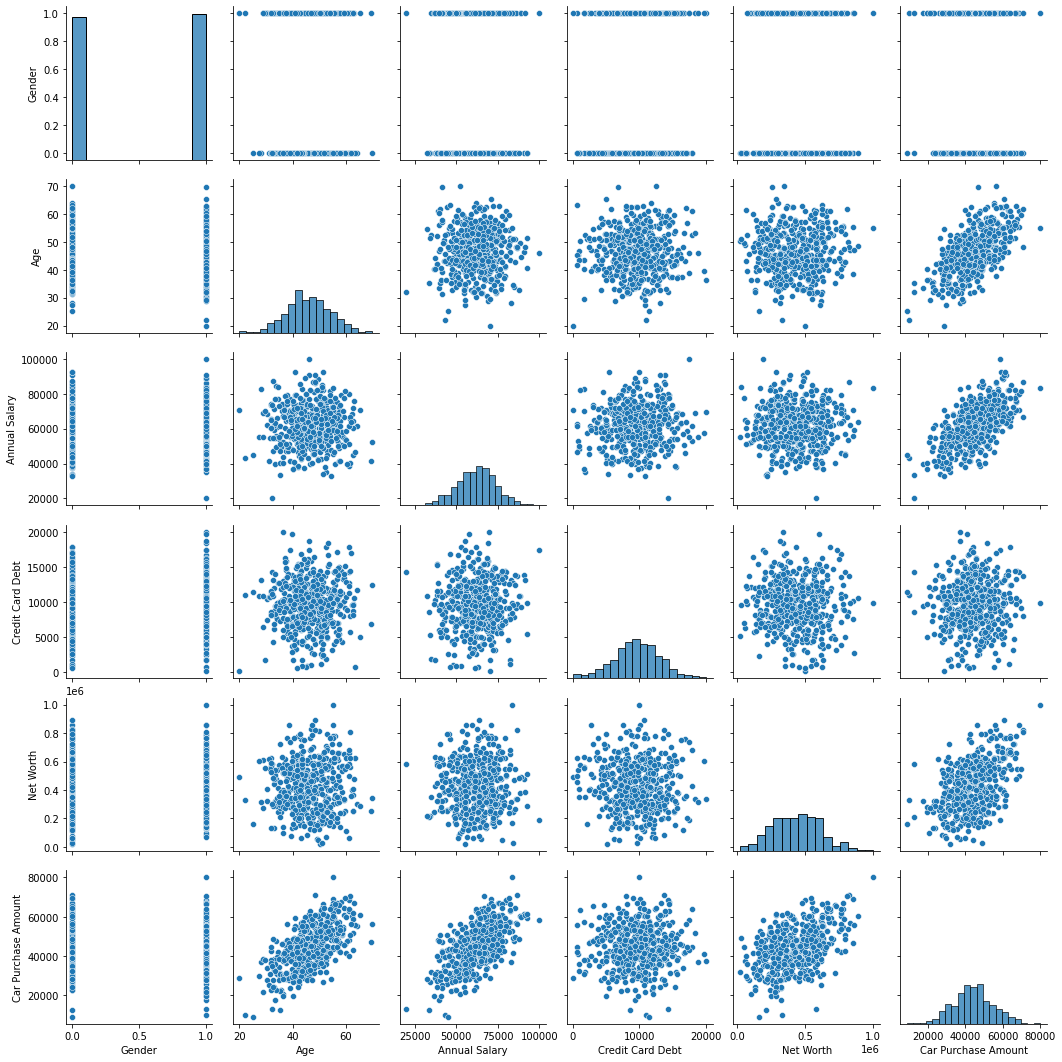

In [ ]:
sns.pairplot(car_df)
plt.show()

In [ ]:
car_df.corr()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
Annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


성별도 같이 표시하고 싶을 때

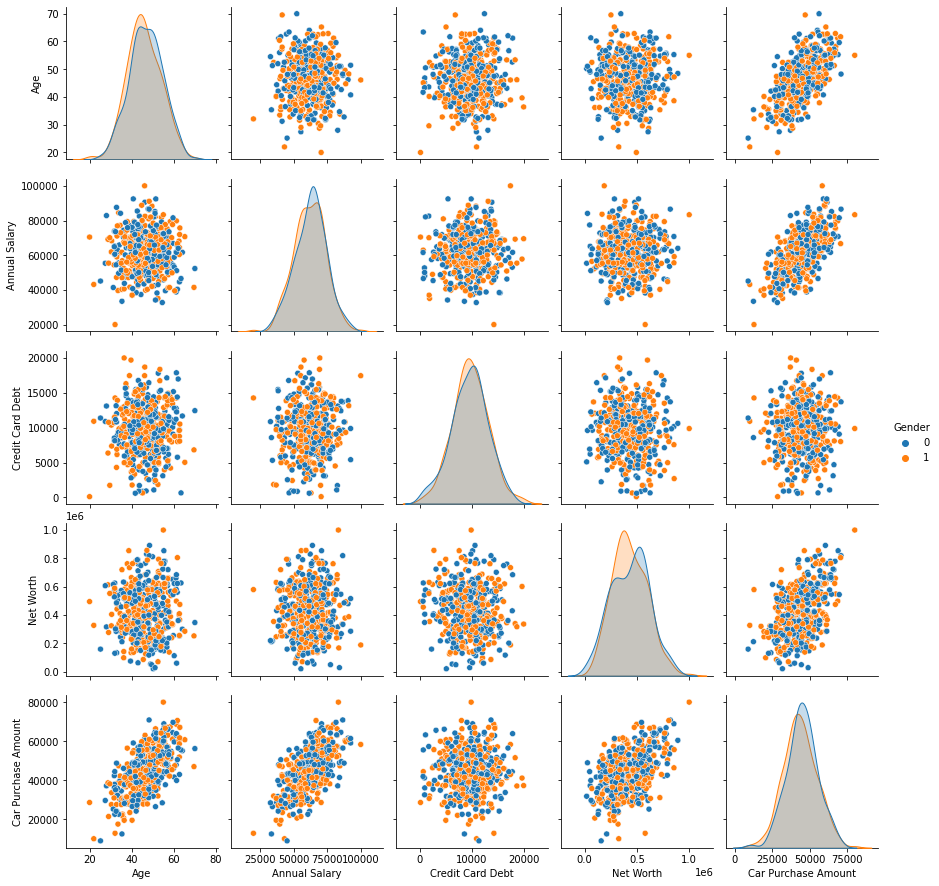

In [ ]:
sns.pairplot(car_df, hue='Gender')
plt.show()

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING




### NaN 값이 있으면, 이를 해결하시오.

In [ ]:
car_df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

### 학습을 위해 'Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount' 컬럼을 제외한 컬럼만, X로 만드시오.

In [ ]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)

In [ ]:
# X = car_df.iloc[:, 3:7 + 1]

In [ ]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


### y 값은 'Car Purchase Amount' 컬럼으로 셋팅하시오.

In [ ]:
y = car_df['Car Purchase Amount']

### 피처 스케일링 하겠습니다. 정규화(normalization)를 사용합니다. MinMaxScaler 를 이용하시오.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc_X = MinMaxScaler()

In [ ]:
X_scaled = sc_X.fit_transform(X)

In [ ]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [ ]:
X_scaled.min(axis=0)

array([0., 0., 0., 0., 0.])

In [ ]:
X_scaled.max(axis=0)

array([1., 1., 1., 1., 1.])

### 학습을 위해서, y 의 shape 을 변경하시오.

In [ ]:
y.shape

(500,)

y는 현재 1차원인데 스케일링을 하기 위해선 2차원으로 변환시켜줘야 함

In [ ]:
y = y.values.reshape(-1, 1)

### y 도 피처 스케일링 하겠습니다. X 처럼 y도 노멀라이징 하시오.

In [ ]:
sc_y = MinMaxScaler()

In [ ]:

y_scaled = sc_y.fit_transform(y)

# STEP#4: TRAINING THE MODEL

### 트레이닝셋과 테스트셋으로 분리하시오. (테스트 사이즈는 25%로 하며, 동일 결과를 위해 랜덤스테이트는 50 으로 셋팅하시오.)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=50)

### 아래 라이브러리를 임포트 하시오

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

### 딥러닝을 이용한 모델링을 하시오.

In [ ]:
model = Sequential()
model.add( Dense(input_dim=5, units=25, activation='relu'))
model.add( Dense(units=40, activation='relu'))
model.add( Dense(units=32, activation='relu'))
model.add( Dense(units=1, activation= 'linear'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 25)                150       
_________________________________________________________________
dense_13 (Dense)             (None, 40)                1040      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1312      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 2,535
Trainable params: 2,535
Non-trainable params: 0
_________________________________________________________________


### 옵티마이저는 'adam' 으로 하고, 로스펑션은 'mean_squared_error' 로 셋팅하여 컴파일 하시오

In [ ]:
model.compile( optimizer='adam', loss='mean_squared_error')

### 학습을 진행하시오.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger

In [ ]:
cp = ModelCheckpoint('car_ai.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [ ]:
csv_logger = CSVLogger('epoch_log.csv', append=True) # append=True 학습될 때마다 추가

In [ ]:
epoch_history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_data=(X_test, y_test), callbacks=[cp, csv_logger])

Epoch 1/100
15/15 [==============================] - 1s 22ms/step - loss: 0.2632 - val_loss: 0.0926

Epoch 00001: val_loss improved from inf to 0.09263, saving model to car_ai.h5
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0741 - val_loss: 0.0272

Epoch 00002: val_loss improved from 0.09263 to 0.02720, saving model to car_ai.h5
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0250 - val_loss: 0.0189

Epoch 00003: val_loss improved from 0.02720 to 0.01891, saving model to car_ai.h5
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.0178

Epoch 00004: val_loss improved from 0.01891 to 0.01783, saving model to car_ai.h5
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.0159

Epoch 00005: val_loss improved from 0.01783 to 0.01590, saving model to car_ai.h5
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0

# STEP#5: EVALUATING THE MODEL 

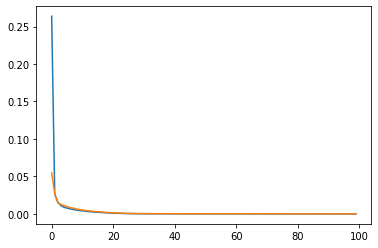

In [ ]:
plt.plot(epoch_history.history['loss'])
plt.plot(epoch_history.history['val_loss'])
plt.show()

### 테스트셋으로 예측을 해 보시오.

In [ ]:
y_pred = model.predict(X_test)

### 실제값과 예측값을 plot 으로 나타내시오.

In [ ]:
result_df = pd.DataFrame({'실제값': y_test.reshape(-1, ), '예측값': y_pred.reshape(-1, )})

In [ ]:
result_df

,실제값,예측값
0,0.512202,0.515781
1,0.761688,0.771542
2,0.653811,0.661574
3,0.534306,0.537213
4,0.526737,0.526476
...,...,...
120,0.381870,0.380237
121,0.307410,0.308986
122,0.593394,0.597977
123,0.467432,0.465734


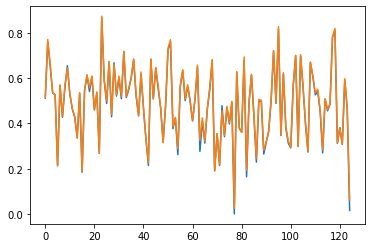

In [ ]:
plt.plot(result_df['실제값'])
plt.plot(result_df['예측값'])
plt.show()

### MSE 를 계산하시오.

In [ ]:
result_df['오차(error)'] = result_df['실제값'] - result_df['예측값']

In [ ]:
result_df

,실제값,예측값,오차(error)
0,0.512202,0.515781,-0.003578
1,0.761688,0.771542,-0.009854
2,0.653811,0.661574,-0.007763
3,0.534306,0.537213,-0.002907
4,0.526737,0.526476,0.000261
...,...,...,...
120,0.381870,0.380237,0.001633
121,0.307410,0.308986,-0.001576
122,0.593394,0.597977,-0.004583
123,0.467432,0.465734,0.001698


In [ ]:
# MSE
(result_df['오차(error)'] ** 2).mean()

9.65957381810066e-05

### 새로운 고객 데이터가 있습니다. 이 사람은 차량을 얼마정도 구매 가능한지 예측하시오.

### 여자이고, 나이는 38, 연봉은 90000,  카드빚은 2000, 순자산은 500000 일때, 어느정도의 차량을 구매할 수 있을지 예측하시오.

피쳐 스케일링을 보기 위한 문제

In [ ]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [ ]:
new_data = np.array( [ 0, 38, 90000, 2000, 500000]) # 1차원 

In [ ]:
new_data.shape

(5,)

In [ ]:
new_data = new_data.reshape(1, -1) # 1차원 -> 2차원 (2차원으로 학습시켰기 때문에 2차원으로 변환해줘야 한다)

In [ ]:
new_data.shape

(1, 5)

In [ ]:
sc_new_data = sc_X.transform(new_data)

In [ ]:
sc_new_data

array([[0.        , 0.36      , 0.875     , 0.09547739, 0.48979592]])

In [ ]:
y_new_pred = model.predict(sc_new_data)

In [ ]:
y_new_pred

array([[0.6611865]], dtype=float32)

In [ ]:
sc_y.inverse_transform(y_new_pred)

array([[55944.242]], dtype=float32)

In [ ]:
### 스케일러 저장

## 스케일러, 모델 저장

In [ ]:
import joblib
joblib.dump(sc_X, 'sc_X.pk1')

['sc_X.pk1']

In [ ]:
joblib.dump(sc_y, 'sc_y.pk1')

['sc_y.pk1']